<h5><center>Homomorphic Encryption using CKKS[Cheon-Kim-Kim-Song]</center></h5>

<blockquote>
<font size="5">
<i>
<ul>
<li>This notebook is about Homomorphic encryption inference.</li> 
<li>In this example, I used <b>logistic regression</b> for classification task using the <b>wisconsin breast cancer dataset.</b></li>
<i></font>
</blockquote>

<h6><b>Step One:</b> Import libraries</h6>

In [142]:
#importing libraries
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score,\
accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

import statsmodels.api as sm 
import statsmodels.formula.api as sfa
import time

%matplotlib inline

<h6><b>Step two:</b> Working with the dataset</h6>

In [143]:
#Loading the data from library. 
data_breast_cancer = load_breast_cancer()

#viewing the keys (components) of the dataset
print(data_breast_cancer.keys())

print()

#viewing the features (columns)
print(data_breast_cancer.feature_names)

print()

#creating a dataframe for data and feature names. 
breast_cancer_df = pd.DataFrame(data_breast_cancer.data, columns=data_breast_cancer.feature_names)

#viewing the first five(5) rows of the data
print(breast_cancer_df.head())

#viewing the types of the various features
print(breast_cancer_df.dtypes)

print()

#checking for nulls
print(breast_cancer_df.isnull().sum())

print()

#viewing the statistics of the data
print(breast_cancer_df.describe().T)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38   

<h6><b>Step three:</b> Exploratory Data Analysis</h6>

In [144]:
#viewing correlation between features
breast_correlation = breast_cancer_df.corr().round(2)
breast_correlation.shape

(30, 30)

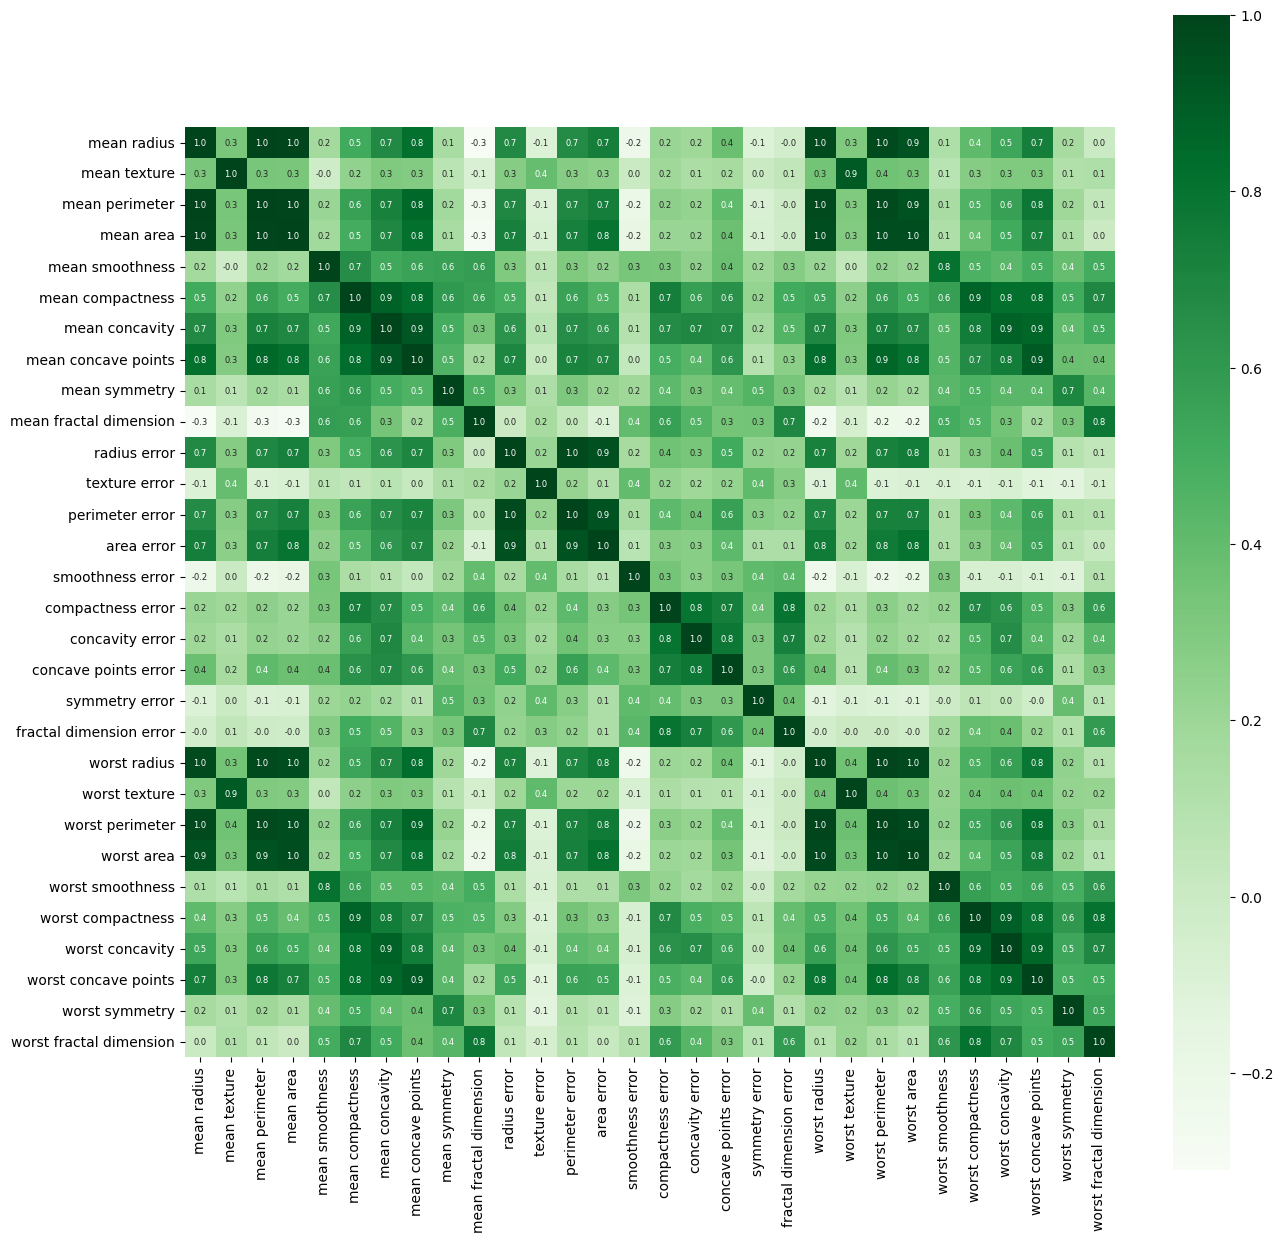

In [145]:
#Plotting correlation using heatmap for features
plt.figure(figsize=(15,15))
sns.heatmap(breast_correlation, cbar=True, square=True, fmt='.1f', annot=True,
            annot_kws={'size':6}, cmap='Greens')
plt.show()

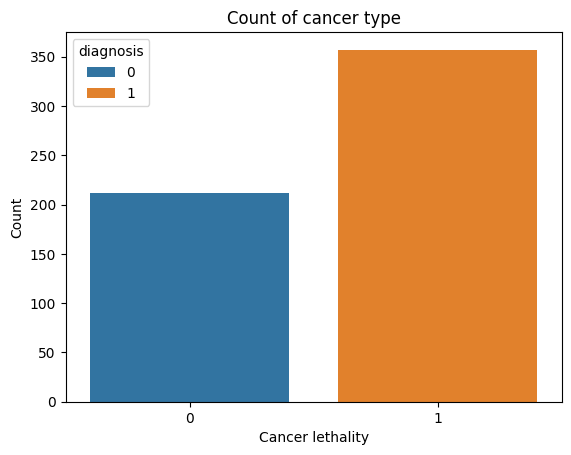

In [146]:
#Viewing counts of the target variable
breast_cancer_df['diagnosis'] = data_breast_cancer.target
plt.title('Count of cancer type')
sns.countplot(x='diagnosis',data=breast_cancer_df, hue='diagnosis')
plt.xlabel('Cancer lethality')
plt.ylabel('Count')
plt.show()

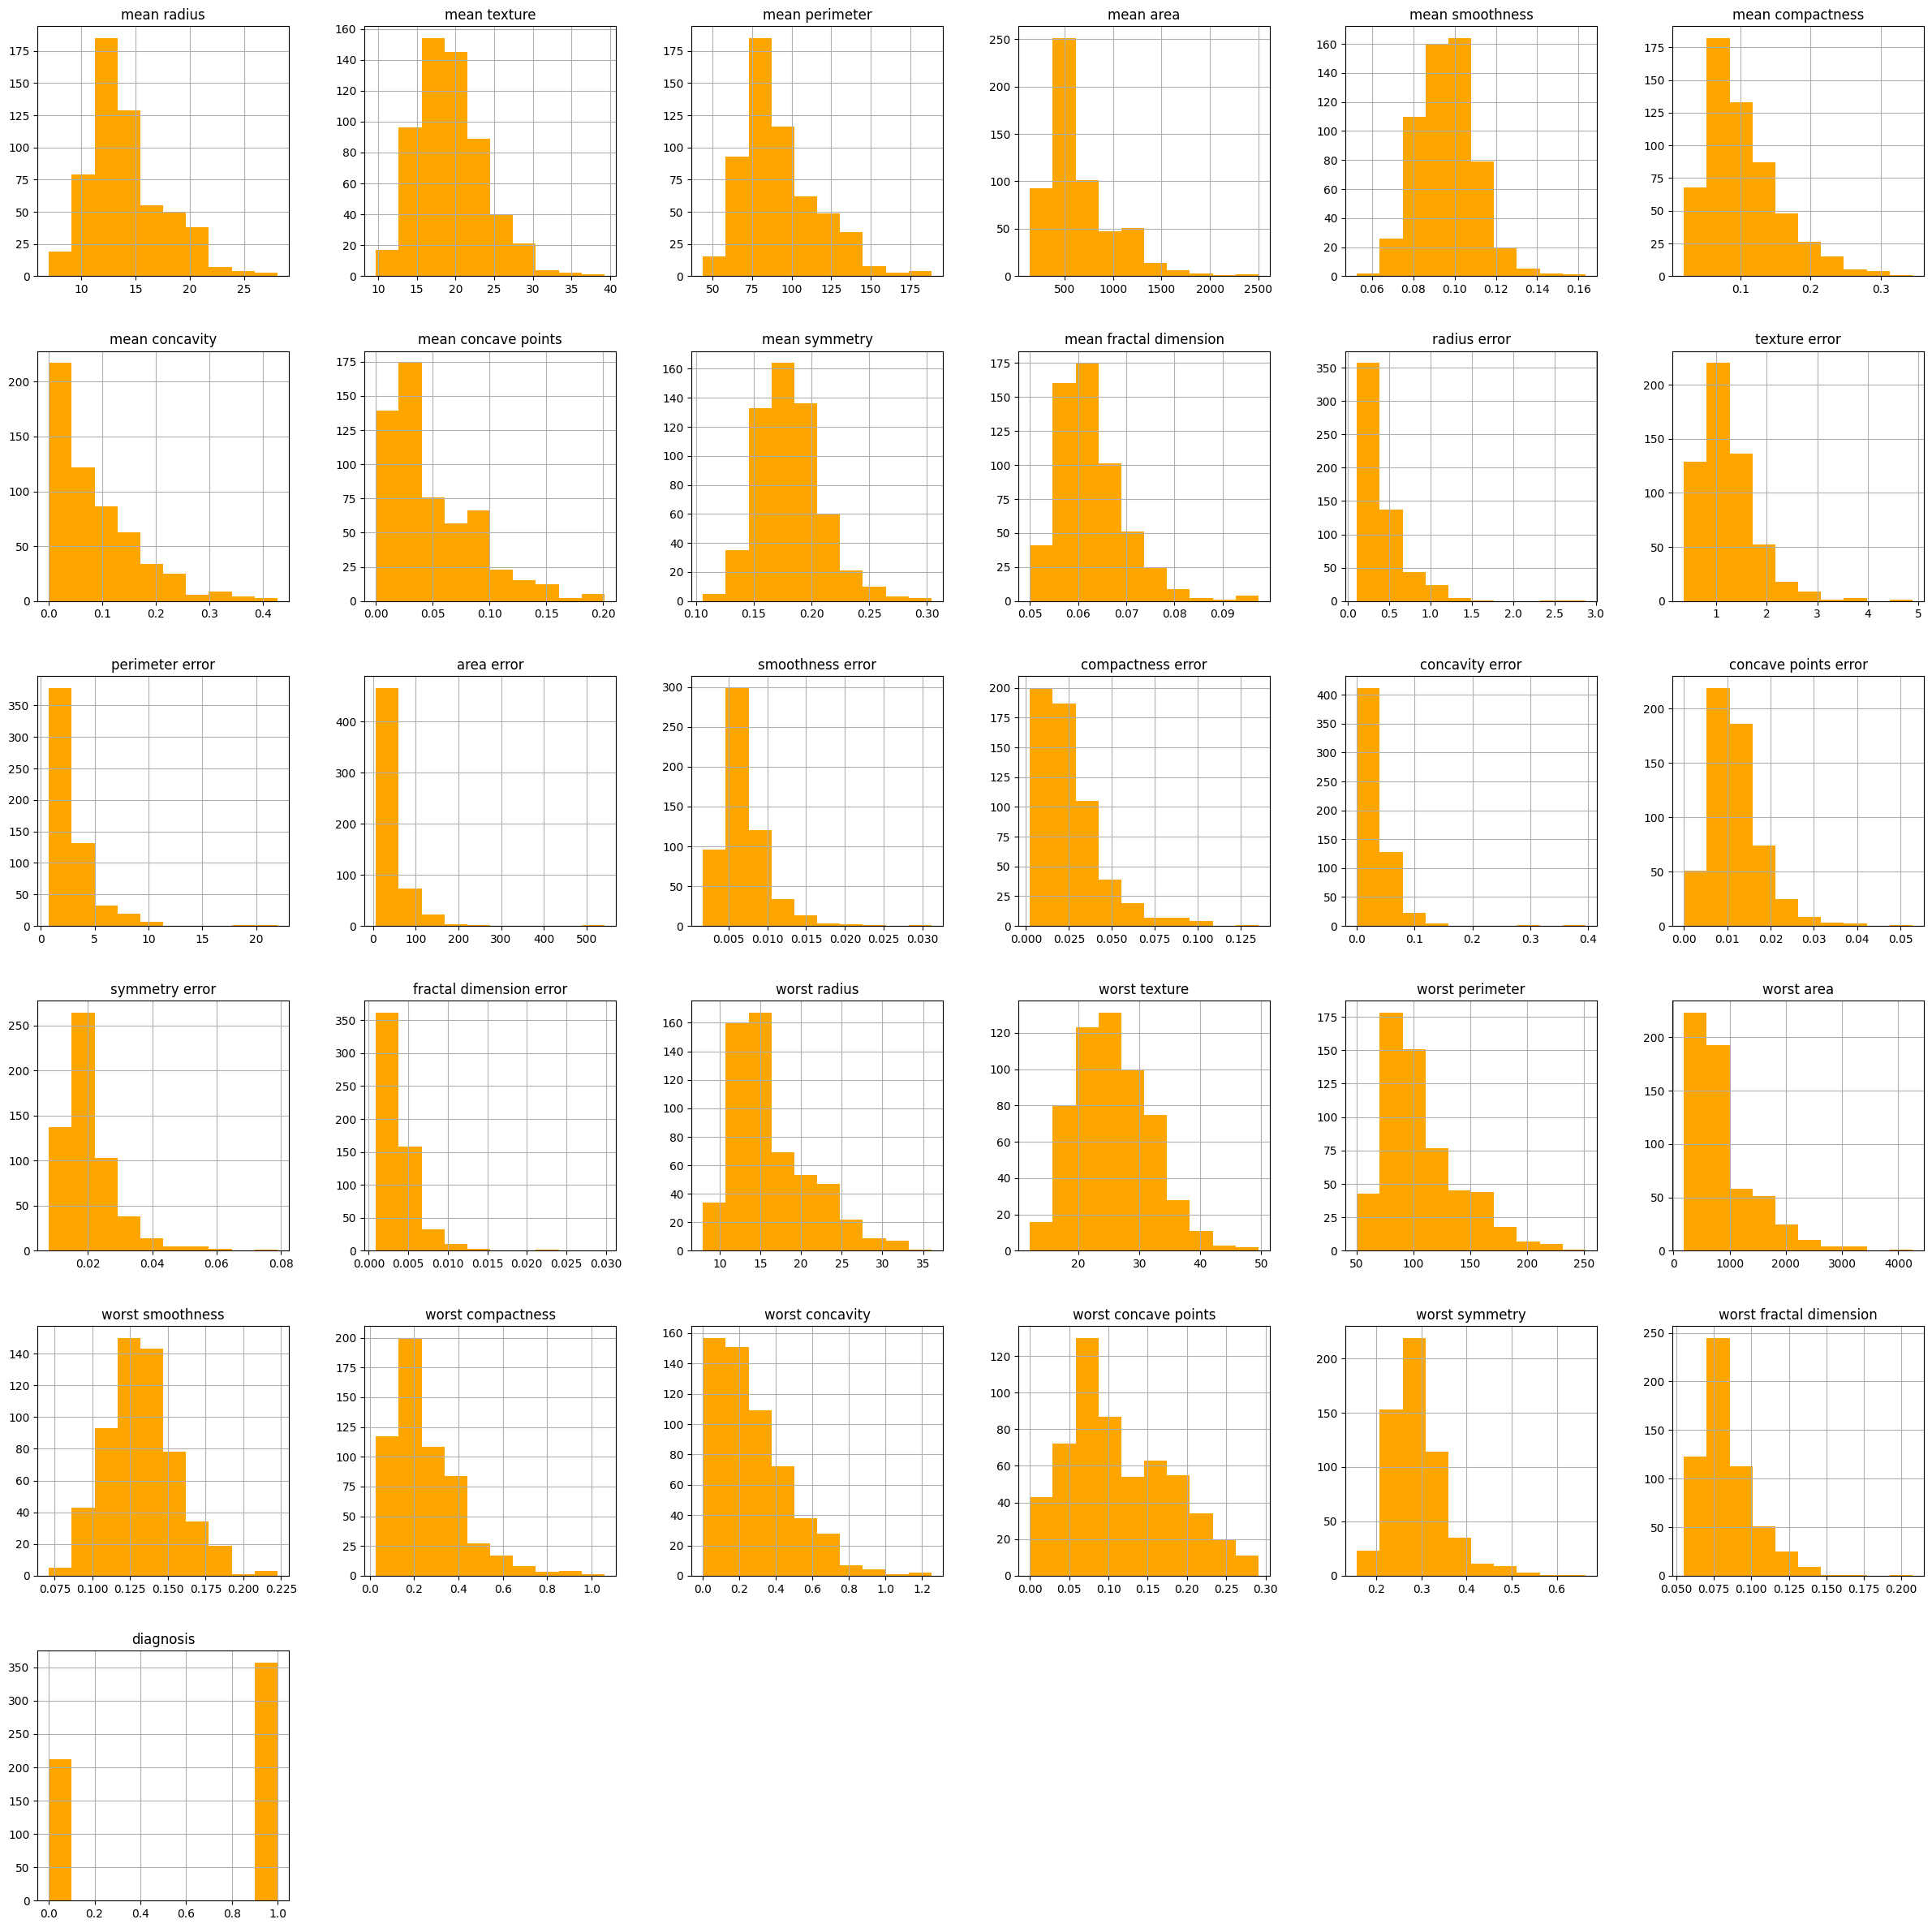

In [147]:
#Histogram for each feature
breast_cancer_df.hist(figsize=(30,30), color='orange')
plt.show()

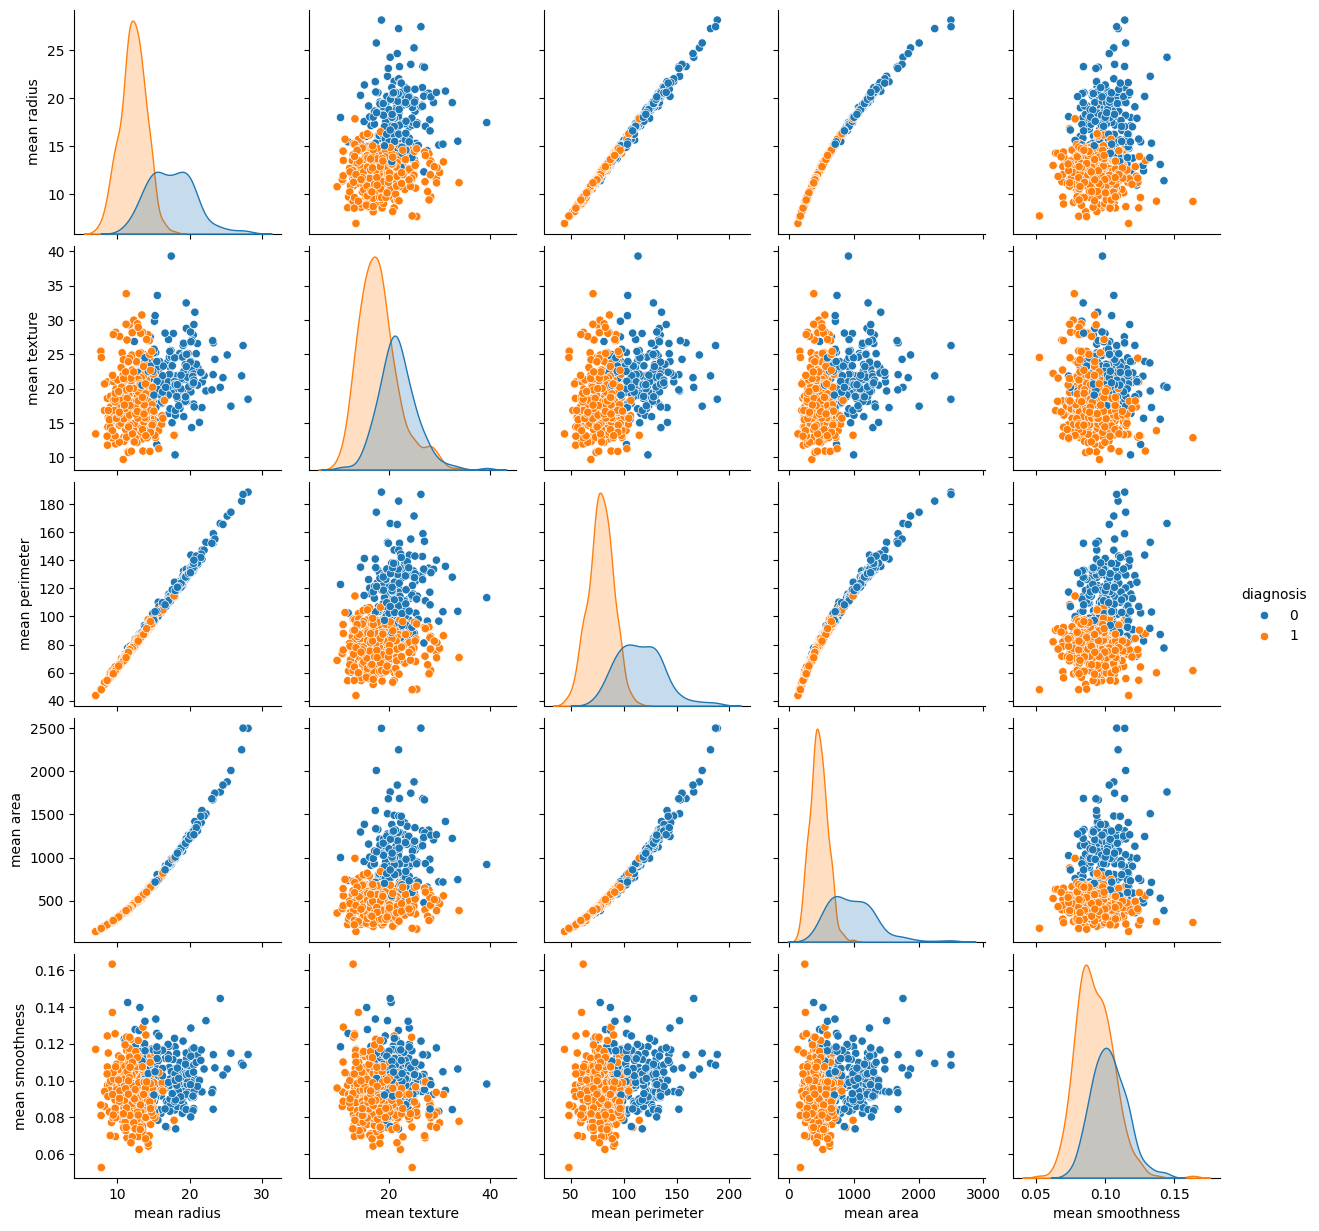

In [148]:
#pair plots using a subset of the features
sns.pairplot(breast_cancer_df, hue='diagnosis',
             vars=['mean radius', 'mean texture', 'mean perimeter', 
                   'mean area', 'mean smoothness'])

<h6><b>Step four:</b> Building Machine Learning Model with <b>PLAIN TEXT</b></h6>

In [149]:
#Eliminating some columns due to multicolinearity which affects outcomes of predictions. 
cols  = ['worst texture', 'worst area', 'worst radius', 'worst perimeter',  'worst smoothness', 
        'worst compactness', 'worst concavity','worst concave points', 'worst symmetry', 
        'worst fractal dimension']

breast_cancer_df = breast_cancer_df.drop(columns=cols, axis=1)

In [150]:
#dropping more columns
cols_1 = ['mean perimeter', 'perimeter error', 'mean area', 'area error']

breast_cancer_df = breast_cancer_df.drop(columns=cols_1, axis=1)

In [151]:
#dropping other multicolinear columns
cols_2 = ['mean concavity', 'concavity error','mean concave points', 'concave points error']

breast_cancer_df = breast_cancer_df.drop(columns=cols_2, axis=1)

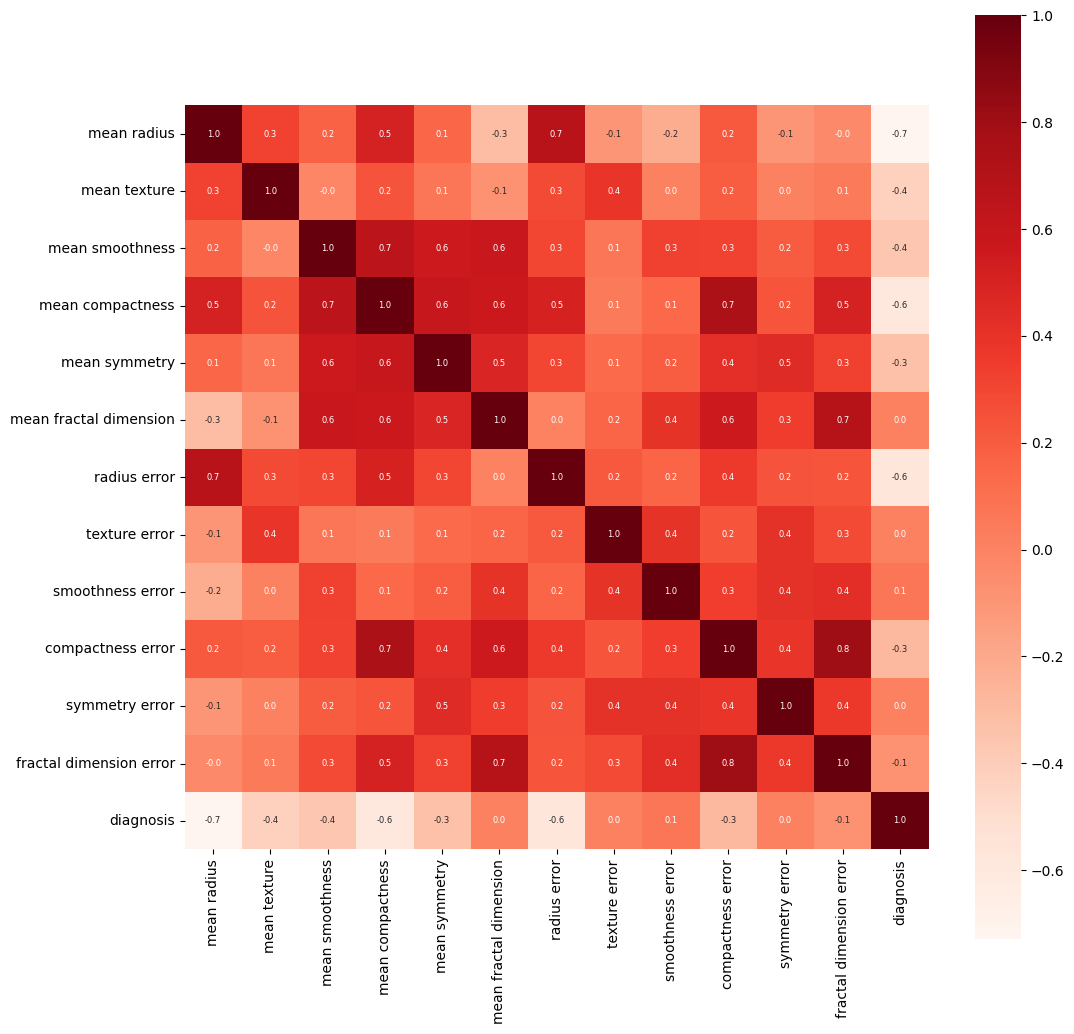

In [152]:
#redrawing the heatmap
new_breast_correlation = breast_cancer_df.corr().round(2)
plt.figure(figsize=(12,12))
sns.heatmap(new_breast_correlation, cbar=True, square=True, fmt='.1f', annot=True,
            annot_kws={'size':6}, cmap='Reds')
plt.show()

In [153]:
#Dividing the dataframe into input variables and target variable
X = breast_cancer_df.iloc[:, :-1].values
y = breast_cancer_df.iloc[:, -1]

In [154]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [156]:
#fitting the model

#using time to measure latency for fitting the model
start_plain_fit = time.time()

#fitting logisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

end_plain_fit = time.time()

In [157]:
accuracy = log_reg.score(X_test, y_test) * 100

print('The accuracy of the model for plain Text is: ', round(accuracy,3), '%')

The accuracy of the model for plain Text is:  92.105 %


In [158]:
#using model to make prediction

#measuring latency for predicting using model
start_plain_predict = time.time()

y_pred = log_reg.predict(X_test)

end_plain_predict = time.time()

In [159]:
#Evaluate the performance metrics for plain text inference
accuracy_plain = round(accuracy_score(y_test, y_pred) * 100,3)
print('Accuracy-plaintext', accuracy_plain, '%')

#precision for plaintext
precision_plain = round(precision_score(y_test, y_pred) * 100,3)
print('Precision-plaintext', precision_plain, '%')

#recall for plaintext
recall_plain = round(recall_score(y_test, y_pred) * 100, 3)
print('Recall-plaintext', recall_plain, '%')

#f1 for plaintext
f1_plain = round(f1_score(y_test,y_pred) * 100, 3)
print('f1-plaintext', f1_plain, '%')

#Show confusion matrix 
conf_mat = confusion_matrix(y_test, y_pred)
print('confusion_matrix: \n', conf_mat)

#show latency for model fitting
latency_plain_fit = end_plain_fit - start_plain_fit
print('Latency for fitting model with plaintext: ', latency_plain_fit, 'secs')

#show latency for model prediction
latency_plain_predict = end_plain_predict - start_plain_predict
print('Latency for fitting model with plaintext: ', latency_plain_predict, 'secs')

latency_plain_total = round((latency_plain_fit + latency_plain_predict) *1000,2)
#calculate total latency for model operation
print('total latency for model plain text operation: ',latency_plain_total, \
      'ms (milliseconds)')

Accuracy-plaintext 92.105 %
Precision-plaintext 91.892 %
Recall-plaintext 95.775 %
f1-plaintext 93.793 %
confusion_matrix: 
 [[37  6]
 [ 3 68]]
Latency for fitting model with plaintext:  0.010591268539428711 secs
Latency for fitting model with plaintext:  0.0009958744049072266 secs
total latency for model plain text operation:  11.59 ms (milliseconds)


<Axes: >

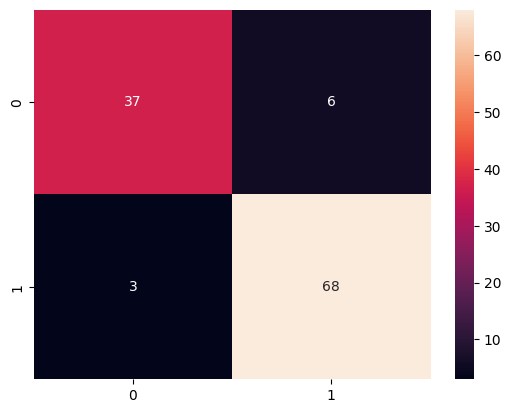

In [160]:
#ploting confusion matrix
plt.Figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True)

In [161]:
#Model weights and bias
weights = log_reg.coef_[0]
bias = log_reg.intercept_[0]

print('Model Weights: ', weights)
print('Bias: ', bias)

Model Weights:  [-0.84154311 -0.25962939 -0.64456315 -1.94273759 -0.99721292 -0.26295999
 -2.17482844  0.75996075 -0.02207236 -0.26599606 -0.0660661  -0.02064216]
Bias:  17.97334613551165


<h6><b>Step five:</b> Building Machine Learning Model with <b>CYPHER TEXT</b></h6>

In [162]:
#importing libraries
import tenseal as ts 

In [163]:
#Need a context to ensure consistency of encryption
context = ts.context(
    scheme = ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree = 8192,
    coeff_mod_bit_sizes = [60, 40, 40, 60]
)

#Enable encryption features
context.global_scale = 2**37
context.generate_galois_keys()
context.generate_relin_keys()

In [164]:
#Encrypting the weights to be used
encrypt_weights = ts.ckks_vector(context, weights)
encrypt_bias = ts.ckks_vector(context, np.array([bias]))

In [173]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [184]:
he_y_test = []

def encrypt_machine_learning(xtest, context, encrypt_weights, encrypt_bias):
    for element in xtest:
        encrypted_sample  = ts.ckks_vector(context,element)
        homo_results = encrypted_sample.dot(encrypt_weights) + encrypt_bias
        decrypted_result = homo_results.decrypt()
        probability = sigmoid(decrypted_result[0])
        print(probability)
        he_y_test.append(1 if probability > 0.5 else 0)
    return he_y_test
        

In [185]:
#latency for encryption using ckks algorithm

start_cyper_total = time.time()

he_y_pred = encrypt_machine_learning(X_test, context, encrypt_weights, encrypt_bias)

end_cyper_total = time.time()

0.9999998862008456
0.9999997221794005
0.9999998313574376
0.9999999001062068
0.999999918394018
0.9999995860199096
0.9999995693309881
0.999999812728231
0.9999998874981406
0.9999998806084396
0.9999998616872872
0.9999998165840752
0.9999998580291476
0.9999998085243826
0.9999999120513523
0.9999997413963531
0.9999998751638521
0.999999920642528
0.9999999509501087
0.9999996811410419
0.9999998792502319
0.9999999027756933
0.9999996279434676
0.9999999137414833
0.9999998888901515
0.9999998992591997
0.9999998962554711
0.9999998980654288
0.9999998907668185
0.9999997558126154
0.9999998962409017
0.9999999139623247
0.9999999115551059
0.9999998812821108
0.9999999187821192
0.9999998990242196
0.9999998143414239
0.9999999083515911
0.999999772982245
0.9999998335248408
0.9999999108928348
0.9999998071719246
0.9999999052049194
0.9999998970730369
0.9999999029010361
0.9999998957076708
0.999999930622593
0.9999999047019967
0.9999998946267856
0.9999998991657599
0.9999997843072926
0.999999702297161
0.9999998662232573

In [178]:
he_y_pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [136]:
#Evaluate the performance for cypher text inference
accuracy_cypher = round(accuracy_score(y_test, he_y_pred) * 100,3)
print('Accuracy-cypher', accuracy_cypher,'%')

#precision
precision_cypher = round(precision_score(y_test, he_y_pred) * 100,3)
print('Precision-cypher', precision_cypher,'%')

f1_cypher = round(f1_score(y_test, he_y_pred) * 100,3)
print('F1-cypher', f1_cypher,'%')

recall_cypher = round(recall_score(y_test,he_y_pred) * 100,3)
print('Recall-cypher',recall_cypher,'%' )

#Show confusion matrix 
conf_mat = confusion_matrix(y_test, he_y_pred)
print('confusion_matrix: \n', conf_mat)

latency_cyper_total = round((end_cyper_total - start_cyper_total) * 1000,2)

#total latency for encryption of plain text and prediction using cypertext
print('Total latency for encryption and prediction: ', latency_cyper_total, 'ms (milliseconds)')

Accuracy-cypher 62.281 %
Precision-cypher 62.281 %
F1-cypher 76.757 %
Recall-cypher 100.0 %
confusion_matrix: 
 [[ 0 43]
 [ 0 71]]
Total latency for encryption and prediction:  3217.31 ms (milliseconds)


<h6><b>Step six:</b> Observations and visualization of metrics<b></b></h6>

latency ration between cyphertext and plaintext (2^40) is:  454.74

The plot of plaintext metrics against cypher text metrics



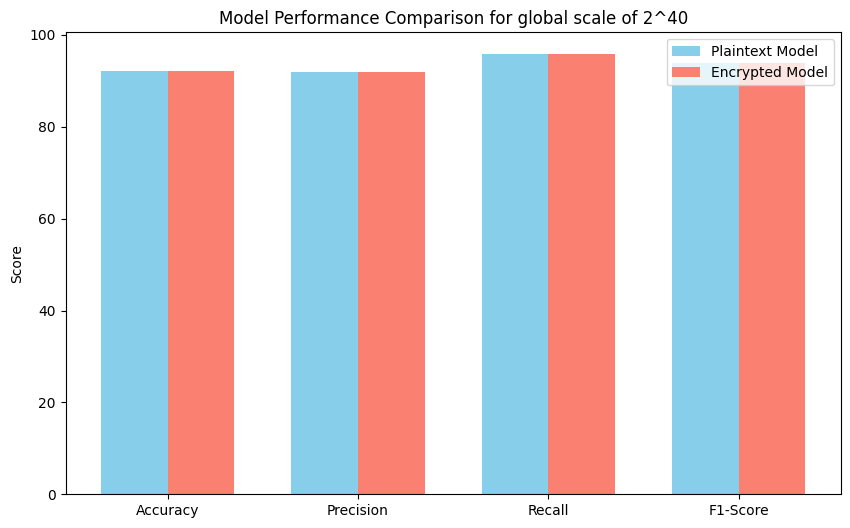

In [125]:
#using a global scale of 2**40
#latency ration  the cyphertext over the plaintext is:
print('latency ration between cyphertext and plaintext (2^40) is: ', latency_cyper_total/latency_plain_total)

print()
#The plot of plaintext metrics against cypher text metrics
print('The plot of plaintext metrics against cypher text metrics')
print()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plaintext = [accuracy_plain, precision_plain, recall_plain, f1_plain]
cyphertext = [accuracy_cypher, precision_cypher, recall_cypher,f1_cypher]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, plaintext, width, label="Plaintext Model", color="skyblue")
plt.bar(x + width/2, cyphertext, width, label="Encrypted Model", color="salmon")
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison for global scale of 2^40")
plt.legend()

latency ration between cyphertext and plaintext (2^39) is:  408.56333333333333

The plot of plaintext metrics against cypher text metrics



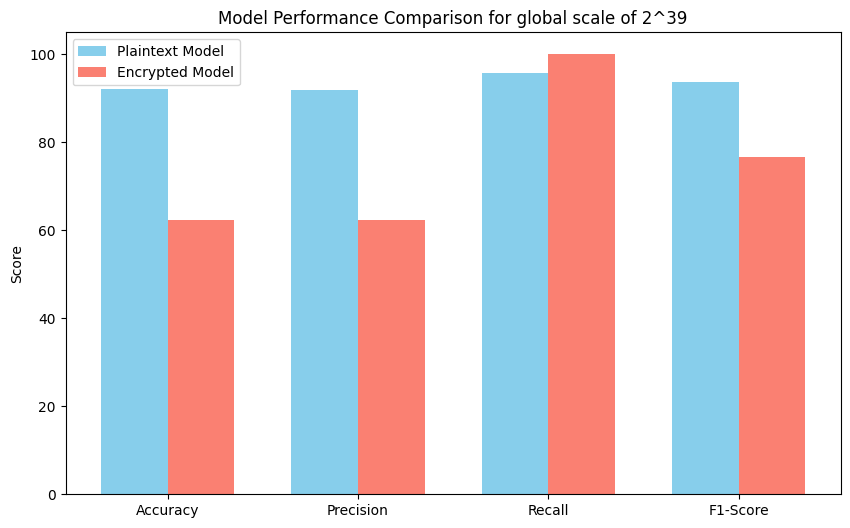

In [119]:
#using a global scale of 2**39
#latency ration  the cyphertext over the plaintext is:
print('latency ration between cyphertext and plaintext (2^39) is: ', latency_cyper_total/latency_plain_total)

print()
#The plot of plaintext metrics against cypher text metrics
print('The plot of plaintext metrics against cypher text metrics')
print()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plaintext = [accuracy_plain, precision_plain, recall_plain, f1_plain]
cyphertext = [accuracy_cypher, precision_cypher, recall_cypher,f1_cypher]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, plaintext, width, label="Plaintext Model", color="skyblue")
plt.bar(x + width/2, cyphertext, width, label="Encrypted Model", color="salmon")
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison for global scale of 2^39")
plt.legend()

latency ration between cyphertext and plaintext (2^38) is:  337.2733333333333


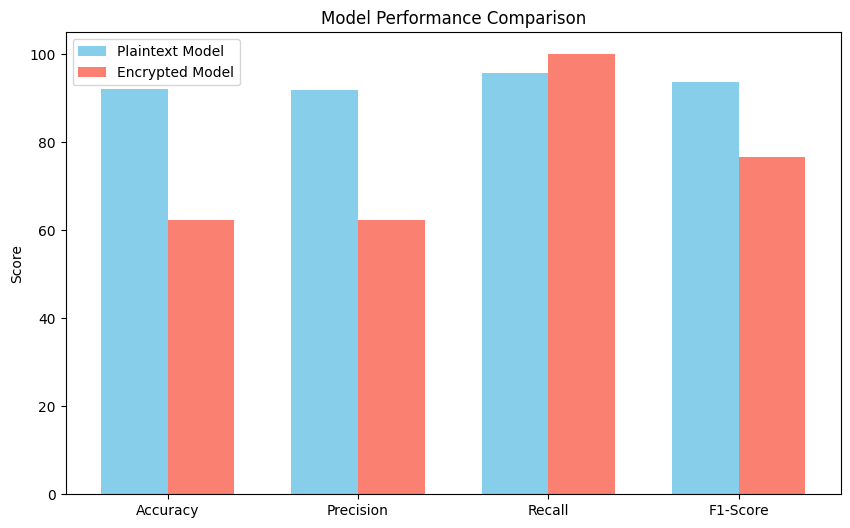

In [131]:
#using a global scale of 2**38
#latency ration  the cyphertext over the plaintext is:
print('latency ration between cyphertext and plaintext (2^38) is: ', latency_cyper_total/latency_plain_total)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plaintext = [accuracy_plain, precision_plain, recall_plain, f1_plain]
cyphertext = [accuracy_cypher, precision_cypher, recall_cypher,f1_cypher]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, plaintext, width, label="Plaintext Model", color="skyblue")
plt.bar(x + width/2, cyphertext, width, label="Encrypted Model", color="salmon")
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()

latency ration between cyphertext and plaintext (2^37) is:  357.4788888888889


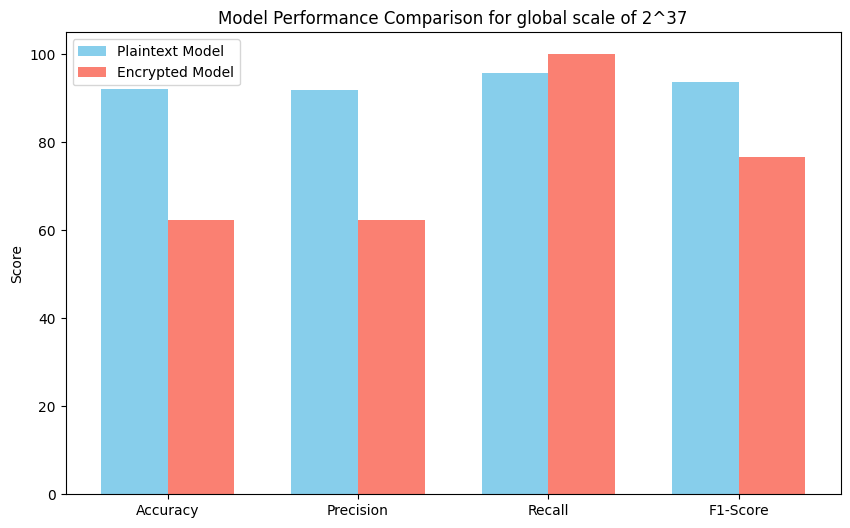

In [141]:
#using a global scale of 2**37
#latency ration  the cyphertext over the plaintext is:
print('latency ration between cyphertext and plaintext (2^37) is: ', latency_cyper_total/latency_plain_total)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plaintext = [accuracy_plain, precision_plain, recall_plain, f1_plain]
cyphertext = [accuracy_cypher, precision_cypher, recall_cypher,f1_cypher]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, plaintext, width, label="Plaintext Model", color="skyblue")
plt.bar(x + width/2, cyphertext, width, label="Encrypted Model", color="salmon")
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison for global scale of 2^37")
plt.legend()